In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/slice_data.csv')
df

,날짜,번호판,일일주행거리,누적주행거리,정보발생일시,차량속도,RPM,브레이크,GPS_X,GPS_Y,방위각,가속도_X,가속도_Y
0,20221201,부산70자1854,0,66443,22120105071500,0,193,0,129.158670,35.236021,0,-6.3,0.7
1,20221201,부산70자1854,0,66443,22120105071600,0,388,0,129.158670,35.236021,0,-7.9,1.6
2,20221201,부산70자1854,0,66443,22120105071700,0,777,0,129.158670,35.236021,0,-8.9,2.2
3,20221201,부산70자1854,0,66443,22120105071800,0,638,0,129.158670,35.236021,0,-6.6,0.8
4,20221201,부산70자1854,0,66443,22120105071900,0,461,0,129.158670,35.236021,0,-7.1,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948207,20221231,부산70자1894,176,3095705,22123121033800,0,331,0,129.158597,35.235956,66,-5.7,-1.2
5948208,20221231,부산70자1894,176,3095705,22123121033900,0,59,0,129.158597,35.235956,66,-5.8,-1.4
5948209,20221231,부산70자1894,176,3095705,22123121034000,0,0,0,129.158597,35.235956,66,-5.4,-1.0
5948210,20221231,부산70자1894,176,3095705,22123121034100,0,0,0,129.158597,35.235956,66,-5.4,-0.9


In [3]:
df['회전max'] = df['차량속도'].apply(lambda x: -1.63025e-10 * x ** 5 + 9.3657e-8 * x ** 4 + -2.79251e-5 * x ** 3 + 0.00558615 * x ** 2 + -0.720465791 * x + 46.54816873)
df['회전min'] = df['차량속도'].apply(lambda x: -9.16276e-11 * x ** 5 + 5.5415e-8 * x ** 4 + -1.77585e-5 * x ** 3 + 0.003847997 * x ** 2 + -0.545259454 * x + 38.54364335)
df

,날짜,번호판,일일주행거리,누적주행거리,정보발생일시,차량속도,RPM,브레이크,GPS_X,GPS_Y,방위각,가속도_X,가속도_Y,회전max,회전min
0,20221201,부산70자1854,0,66443,22120105071500,0,193,0,129.158670,35.236021,0,-6.3,0.7,46.548169,38.543643
1,20221201,부산70자1854,0,66443,22120105071600,0,388,0,129.158670,35.236021,0,-7.9,1.6,46.548169,38.543643
2,20221201,부산70자1854,0,66443,22120105071700,0,777,0,129.158670,35.236021,0,-8.9,2.2,46.548169,38.543643
3,20221201,부산70자1854,0,66443,22120105071800,0,638,0,129.158670,35.236021,0,-6.6,0.8,46.548169,38.543643
4,20221201,부산70자1854,0,66443,22120105071900,0,461,0,129.158670,35.236021,0,-7.1,0.8,46.548169,38.543643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948207,20221231,부산70자1894,176,3095705,22123121033800,0,331,0,129.158597,35.235956,66,-5.7,-1.2,46.548169,38.543643
5948208,20221231,부산70자1894,176,3095705,22123121033900,0,59,0,129.158597,35.235956,66,-5.8,-1.4,46.548169,38.543643
5948209,20221231,부산70자1894,176,3095705,22123121034000,0,0,0,129.158597,35.235956,66,-5.4,-1.0,46.548169,38.543643
5948210,20221231,부산70자1894,176,3095705,22123121034100,0,0,0,129.158597,35.235956,66,-5.4,-0.9,46.548169,38.543643


In [4]:
df['회전max2'] = df['회전max'] * 2 - df['회전min']

In [5]:
l = []
for i in df.index:
    if i == 0:
        l.append(0)
        continue
    l.append(df['방위각'][i] - df['방위각'][i - 1])

In [6]:
df['회전'] = l

In [7]:
label = []
for i in df.index:
    if df['회전'][i] < df['회전min'][i]:
        label.append(0)
    elif df['회전min'][i] <= df['회전'][i] < df['회전max'][i]:
        label.append(1)
    elif df['회전max'][i] <= df['회전'][i] < df['회전max2'][i]:
        label.append(2)
    else:
        label.append(3)

In [8]:
df['위험운전회전'] = label
df

,날짜,번호판,일일주행거리,누적주행거리,정보발생일시,차량속도,RPM,브레이크,GPS_X,GPS_Y,방위각,가속도_X,가속도_Y,회전max,회전min,회전max2,회전,위험운전회전
0,20221201,부산70자1854,0,66443,22120105071500,0,193,0,129.158670,35.236021,0,-6.3,0.7,46.548169,38.543643,54.552694,0,0
1,20221201,부산70자1854,0,66443,22120105071600,0,388,0,129.158670,35.236021,0,-7.9,1.6,46.548169,38.543643,54.552694,0,0
2,20221201,부산70자1854,0,66443,22120105071700,0,777,0,129.158670,35.236021,0,-8.9,2.2,46.548169,38.543643,54.552694,0,0
3,20221201,부산70자1854,0,66443,22120105071800,0,638,0,129.158670,35.236021,0,-6.6,0.8,46.548169,38.543643,54.552694,0,0
4,20221201,부산70자1854,0,66443,22120105071900,0,461,0,129.158670,35.236021,0,-7.1,0.8,46.548169,38.543643,54.552694,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948207,20221231,부산70자1894,176,3095705,22123121033800,0,331,0,129.158597,35.235956,66,-5.7,-1.2,46.548169,38.543643,54.552694,0,0
5948208,20221231,부산70자1894,176,3095705,22123121033900,0,59,0,129.158597,35.235956,66,-5.8,-1.4,46.548169,38.543643,54.552694,0,0
5948209,20221231,부산70자1894,176,3095705,22123121034000,0,0,0,129.158597,35.235956,66,-5.4,-1.0,46.548169,38.543643,54.552694,0,0
5948210,20221231,부산70자1894,176,3095705,22123121034100,0,0,0,129.158597,35.235956,66,-5.4,-0.9,46.548169,38.543643,54.552694,0,0


In [9]:
df.query('번호판 != "부산70자1893"')

,날짜,번호판,일일주행거리,누적주행거리,정보발생일시,차량속도,RPM,브레이크,GPS_X,GPS_Y,방위각,가속도_X,가속도_Y,회전max,회전min,회전max2,회전,위험운전회전
0,20221201,부산70자1854,0,66443,22120105071500,0,193,0,129.158670,35.236021,0,-6.3,0.7,46.548169,38.543643,54.552694,0,0
1,20221201,부산70자1854,0,66443,22120105071600,0,388,0,129.158670,35.236021,0,-7.9,1.6,46.548169,38.543643,54.552694,0,0
2,20221201,부산70자1854,0,66443,22120105071700,0,777,0,129.158670,35.236021,0,-8.9,2.2,46.548169,38.543643,54.552694,0,0
3,20221201,부산70자1854,0,66443,22120105071800,0,638,0,129.158670,35.236021,0,-6.6,0.8,46.548169,38.543643,54.552694,0,0
4,20221201,부산70자1854,0,66443,22120105071900,0,461,0,129.158670,35.236021,0,-7.1,0.8,46.548169,38.543643,54.552694,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948207,20221231,부산70자1894,176,3095705,22123121033800,0,331,0,129.158597,35.235956,66,-5.7,-1.2,46.548169,38.543643,54.552694,0,0
5948208,20221231,부산70자1894,176,3095705,22123121033900,0,59,0,129.158597,35.235956,66,-5.8,-1.4,46.548169,38.543643,54.552694,0,0
5948209,20221231,부산70자1894,176,3095705,22123121034000,0,0,0,129.158597,35.235956,66,-5.4,-1.0,46.548169,38.543643,54.552694,0,0
5948210,20221231,부산70자1894,176,3095705,22123121034100,0,0,0,129.158597,35.235956,66,-5.4,-0.9,46.548169,38.543643,54.552694,0,0


In [10]:
df.to_csv('../data/0605_회전분류.csv', index=False)

In [11]:
velocity = [i for i in range(60)]

In [12]:
temp = pd.DataFrame({'속도': velocity})

In [13]:
temp['ymax'] = temp['속도'].apply(lambda x: -1.63025e-10 * x ** 5 + 9.3657e-8 * x ** 4 + -2.79251e-5 * x ** 3 + 0.00558615 * x ** 2 + -0.720465791 * x + 46.54816873)

In [14]:
temp['ymin'] = temp['속도'].apply(lambda x: -9.16276e-11 * x ** 5 + 5.5415e-8 * x ** 4 + -1.77585e-5 * x ** 3 + 0.003847997 * x ** 2 + -0.545259454 * x + 38.54364335)

In [15]:
temp['ymax2'] = temp['ymax'] * 2 - temp['ymin']

In [16]:
temp

,속도,ymax,ymin,ymax2
0,0,46.548169,38.543643,54.552694
1,1,45.833261,38.002214,53.664308
2,2,45.129360,37.468375,52.790344
3,3,44.436300,36.942022,51.930579
4,4,43.753921,36.423051,51.084790
5,5,43.082061,35.911361,50.252761
6,6,42.420564,35.406850,49.434278
7,7,41.769273,34.909419,48.629127
8,8,41.128037,34.418971,47.837102
9,9,40.496702,33.935408,47.057996


In [17]:
df['회전'] = df['회전'].apply(lambda x: abs(x))

In [18]:
df = df.query('회전 < 60')

In [19]:
d = df.query('번호판 == "부산70자1854"')

In [20]:
d

,날짜,번호판,일일주행거리,누적주행거리,정보발생일시,차량속도,RPM,브레이크,GPS_X,GPS_Y,방위각,가속도_X,가속도_Y,회전max,회전min,회전max2,회전,위험운전회전
0,20221201,부산70자1854,0,66443,22120105071500,0,193,0,129.15867,35.236021,0,-6.3,0.7,46.548169,38.543643,54.552694,0,0
1,20221201,부산70자1854,0,66443,22120105071600,0,388,0,129.15867,35.236021,0,-7.9,1.6,46.548169,38.543643,54.552694,0,0
2,20221201,부산70자1854,0,66443,22120105071700,0,777,0,129.15867,35.236021,0,-8.9,2.2,46.548169,38.543643,54.552694,0,0
3,20221201,부산70자1854,0,66443,22120105071800,0,638,0,129.15867,35.236021,0,-6.6,0.8,46.548169,38.543643,54.552694,0,0
4,20221201,부산70자1854,0,66443,22120105071900,0,461,0,129.15867,35.236021,0,-7.1,0.8,46.548169,38.543643,54.552694,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436754,20221231,부산70자1854,44,72362,22123122521400,0,557,1,129.15837,35.235809,249,-6.7,0.5,46.548169,38.543643,54.552694,0,0
1436755,20221231,부산70자1854,44,72362,22123122521500,0,223,1,129.15837,35.235809,249,-6.8,0.8,46.548169,38.543643,54.552694,0,0
1436756,20221231,부산70자1854,44,72362,22123122521600,0,37,1,129.15837,35.235809,249,-6.8,0.7,46.548169,38.543643,54.552694,0,0
1436757,20221231,부산70자1854,44,72362,22123122521700,0,22,1,129.15837,35.235809,249,-6.2,0.3,46.548169,38.543643,54.552694,0,0


In [21]:
import matplotlib.pyplot as plt

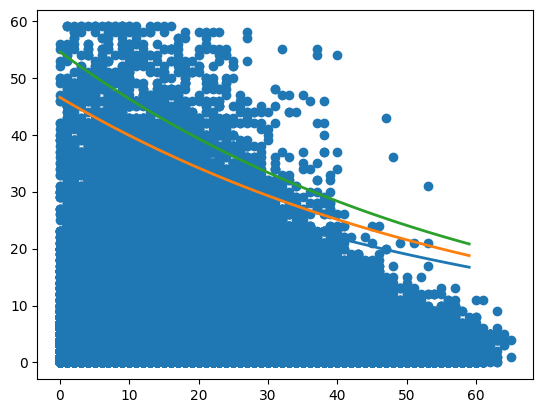

In [22]:
plt.plot(temp['속도'], temp['ymin'], linewidth=2)
plt.plot(temp['속도'], temp['ymax'], linewidth=2)
plt.plot(temp['속도'], temp['ymax2'], linewidth=2)
plt.scatter(d['차량속도'], d['회전'])
plt.show()

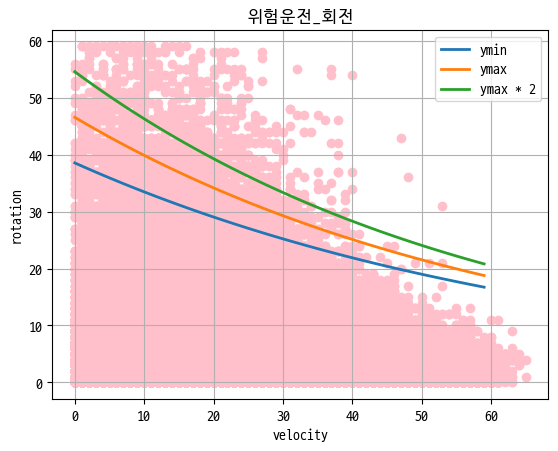

In [26]:
plt.rc('font', family='D2Coding')
plt.title('위험운전_회전')

plt.plot(temp['속도'], temp['ymin'], linewidth=2)
plt.plot(temp['속도'], temp['ymax'], linewidth=2)
plt.plot(temp['속도'], temp['ymax2'], linewidth=2)
plt.xlabel('velocity')
plt.ylabel('rotation')
plt.scatter(d['차량속도'], d['회전'], color='pink')
plt.grid(True)
plt.legend({'ymin': temp['ymin'], 'ymax': temp['ymax'], 'ymax * 2': temp['ymax2']})
plt.show()